In [22]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [23]:
job_id = "job_01h8bjwkatf8krteh6s5hy1x8j"

In [25]:
f = h5.File(f'outputs/{job_id}/dentate_gyrus.h5', 'r')
print(f.keys())

APs = f['action_potentials']; assert isinstance(APs, h5.Group)
print(APs.keys())
print([item for item in APs.items()])

<KeysViewHDF5 ['action_potentials', 'voltages']>
<KeysViewHDF5 ['PerforantPathway', 'Population(BasketCell)#1', 'Population(GlanuleCell)#1', 'Population(HippCell)#1', 'Population(MossyCell)#1']>
[('PerforantPathway', <HDF5 dataset "PerforantPathway": shape (24,), type "|O">), ('Population(BasketCell)#1', <HDF5 dataset "Population(BasketCell)#1": shape (24,), type "|O">), ('Population(GlanuleCell)#1', <HDF5 dataset "Population(GlanuleCell)#1": shape (2000,), type "|O">), ('Population(HippCell)#1', <HDF5 dataset "Population(HippCell)#1": shape (24,), type "|O">), ('Population(MossyCell)#1', <HDF5 dataset "Population(MossyCell)#1": shape (60,), type "|O">)]


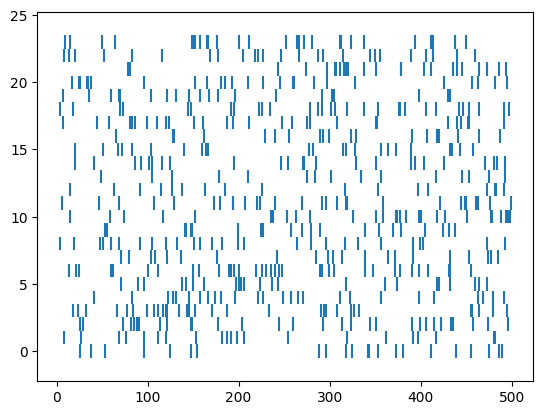

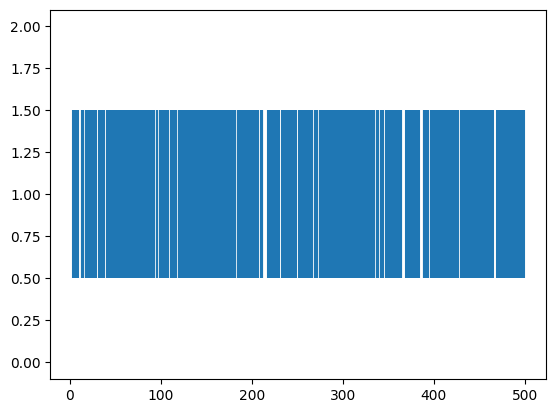

In [18]:
PP = APs['PerforantPathway']; assert isinstance(PP, h5.Dataset)

plt.eventplot(PP)
plt.show()

plt.eventplot(np.concatenate(PP));

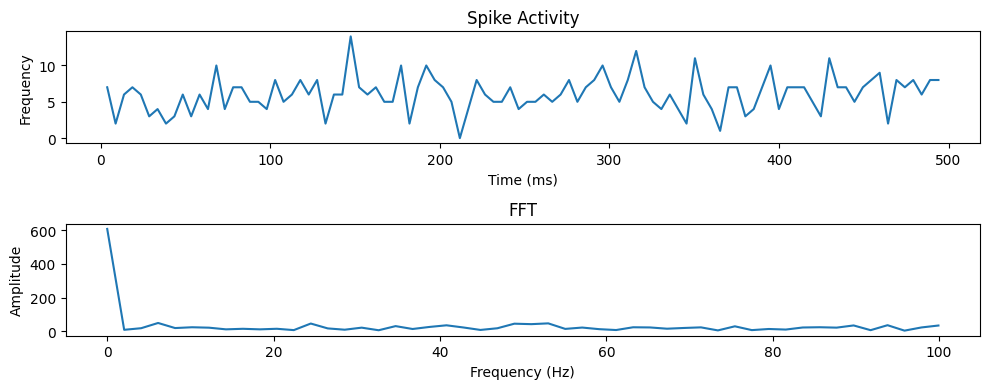

In [19]:
from scipy.signal import windows
from scipy.ndimage import convolve
from numpy.fft import fft, fftshift, fftfreq

spike_times = np.concatenate(PP)

hist, bins = np.histogram(spike_times, bins=100)

# kernel = windows.gaussian(10, 2)
# smoothed_hist = convolve(hist, kernel/kernel.sum(), mode='nearest')
smoothed_hist = hist

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(bins[:-1], smoothed_hist)
plt.title('Spike Activity')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')

sampling_rate = len(bins) / (bins[-1] - bins[0]) * 1000

sp = fftshift(fft(smoothed_hist))
freq = fftshift(fftfreq(len(smoothed_hist), 1/sampling_rate))

amp = np.abs(sp)

plt.subplot(2, 1, 2)
plt.plot(freq[len(freq)//2:], amp[len(amp)//2:])
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
